In [13]:
import os
import datetime
import pandas as pd



# Combine data from all CSV files into a dataframe.
# @params stationId: station id as a string.
#         start_date: date object. Includes this date when reading.
#                     example: datetime.date(2020, 9, 1)
#         end_date: date object. Includes this date when reading.
#         type: determines whether to load MESAN (SMHI) or LANTMET data.
#               type = True -> MESAN
#               type = False -> LANTMET
# @returns comb_df: concatenated dataframe containing all csv data
#                   chronologically. None if a file was not found.
def load_CSV(stationId, type, start_date, end_date):
    
    if type:
        station_dir = 'MESAN_CSV/' + stationId + '/'
    else: 
        station_dir = 'LANTMET_CSV/' + stationId + '/'
    
    # Check if dir exists.
    if not os.path.isdir(station_dir):
        print('load_CSV() >>> No directory: ' + station_dir)
    
    # Loop over days
    current_date = start_date
    frames = []
    for n in range(0, (end_date - start_date + datetime.timedelta(days=1)).days):
        date_str = current_date.strftime('%Y-%m-%d')
        if type:
            current_file = 'MESAN_' + date_str + '.csv'
        else:
            current_file = 'LANTMET_' + date_str + '.csv'
        
        # Try to read file, if file not found, return a None object.
        try:
            frames.append(pd.read_csv(station_dir + current_file))
        except IOError as e:
            print('load_CSV() >>> File not found. (' + current_file + ')')
            return None
        
        current_date = current_date + datetime.timedelta(days=1)
    comb_df = pd.concat(frames, ignore_index=True)
    return comb_df

Text(0.5,0.98,'Temperature variation over september week.')

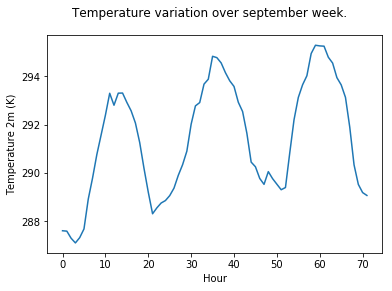

In [14]:
# Example
import matplotlib.pyplot as plt
start_date = datetime.date(2019, 8, 1)
end_date = datetime.date(2019, 8, 3)
df = load_CSV('35004', False, start_date, end_date)

plt.plot([int(x) for x in range(0, df.shape[0])], df['t_sfc'])
plt.xlabel('Hour')
plt.ylabel('Temperature 2m (K)')
plt.suptitle('Temperature variation over september week.')

In [4]:
t = False
if not t:
    print('hej')

hej
